## Машинное обучение

## Домашнее задание 3


### О задании

Ниже даны несколько заданий. Первые два из них самодостаточные, они позволяют лучше познакомиться с логистической регрессией и ROC-кривой. Далее 3 задания выполняются на реальном наборе данных: вам предлагается настроить логистическую регрессию на них, измерить различные метрики качества, попробовать закодировать категориальные признаки и посмотреть на изменение качества предсказаний. Также в последнем задании предлагается самостоятельно разобраться с методами калибровки вероятностей. 

В каждом задании указано число баллов. Почти все задание основано на использовании готовых методов из sklearn и анализе результатов их работы.

In [51]:
%pylab inline
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score

Populating the interactive namespace from numpy and matplotlib


### Задание 1. Обучение логистической регресии на синтетических данных. (2 балла)

Сгенерируйте синтетический датасет для бинарной классификации с помощью `make_classification` с 2 признаками, обучите на нём логистическую регресию. Визуализируйте разделяющую прямую и все объекты. Из иллюстрации должно быть понятно, к какому классу принадлежит объект, и к какому классу его отнесла регресия (это удобно демонстрировать заливкой цветом). 

In [2]:
from sklearn.datasets import make_classification

In [131]:
#создаем датасет, который включает в себя 25 объектов и 2 признака.
X_train, y_train = make_classification(n_samples=25, n_features=2, n_informative=1, n_redundant=0,
                                       n_clusters_per_class=1)

In [16]:
X_train.shape

(25, 2)

In [81]:
X_train

array([[ 1.63832584, -1.16564148],
       [ 2.09655245, -0.22792089],
       [ 0.25249509,  0.30600234],
       [ 0.84454983, -1.11358489],
       [-1.36810059,  1.47445257],
       [ 0.22166661, -0.55949555],
       [ 0.4920001 , -0.55562519],
       [-2.18377821, -0.78034908],
       [ 0.10168206, -0.4893857 ],
       [-0.8122515 ,  0.00437228],
       [-0.93190149, -1.27819958],
       [-1.22503349, -0.91990919],
       [ 0.79719419,  1.09179711],
       [ 1.61554539, -1.57819691],
       [ 0.80652575, -2.64516536],
       [-1.73239704,  1.16418283],
       [-0.4274765 , -0.86801279],
       [ 0.34836075,  1.14101441],
       [-0.42817714,  0.24507717],
       [-1.77724381,  1.1563766 ],
       [ 1.01488034,  1.66238053],
       [ 0.01300391,  1.44939584],
       [-1.07328486,  1.9725427 ],
       [ 1.07117979, -1.83902528],
       [-0.12434685, -1.99128109]])

In [67]:
from sklearn.linear_model import LogisticRegression

In [133]:
clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

In [134]:
weights = clf.coef_
w0 = clf.intercept_ 

In [13]:
import matplotlib.pyplot as plt

$
w_1 \cdot x + w_2 \cdot y + b_0 = 0 \Rightarrow y = \frac{(x \cdot w_1 - w_0)}{w_2}
$

In [117]:
#Через уравнение разделяющей прямой находим значения для вектикальной оси
def get_y_values(first_sign, weights, w0):
    return (weights[0][0]*first_sign + w0)/weights[0][1]

In [135]:
x_values = X_train[:, 0]
y_values = get_y_values(X_train[:, 0], weights, w0)

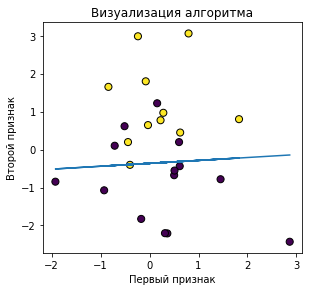

In [137]:
plt.figure(figsize=(4, 4))
plt.subplots_adjust(bottom=0.1, top=.9, left=.05, right=.95)

plt.title("Визуализация алгоритма")
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=50, edgecolor='k')

plt.plot(x_values, y_values)

plt.xlabel('Первый признак')
plt.ylabel('Второй признак')

plt.show()

In [313]:
#По графику видно, что прямая не идеально разделяет датасет. Но с учетом того, что выборка получилось
#не линейно разделимой, то в целом, регрессия неплохо разделяет данные. 

### Задание 2. Самостоятельная реализация вычисления AUC ROC. (3 балла)

Напишите функцию, которая берет на вход `numpy`-вектор правильных ответов `y` (из 0 и 1) и `numpy`-вектор вещественных предсказаний классификатора (длина обоих векторов равна числу объектов) и возвращает значение AUC ROC. Как обычно, можно пользоваться только средствами `numpy` :) Считайте, что в векторе `score_predicted` все элементы различны.

In [15]:
from numpy import trapz
import numpy

In [16]:
import numpy as np

In [33]:
def roc_auc(y_true, score_predicted):
    thresholds = np.arange(1, 0, -0.1)
    fpr = numpy.zeros(shape=(1,(np.asarray(thresholds).shape)[0]))
    tpr = numpy.zeros(shape=(1,(np.asarray(thresholds).shape)[0]))
    for index, thr in enumerate(thresholds):
        tn = fp = tp = fn = 0
        score_predict = (score_predicted > thr).astype(int)
        for y, prd in zip(y_true, score_predict):
            tp += y and prd
            fn += y and not prd
            fp += not y and prd
            tn += not y and not prd    
        fpr[0][index] = fp / (fp + tn)
        tpr[0][index] = tp / (tp + fn)
         
    AUC_ROR = np.trapz(tpr, fpr)
                
    return AUC_ROR[0]

Напишите юнит-тесты (не менее 3) к вашей реализации. Тест — это функция, которая подает на вход `roc_auc` некоторые заранее определенные векторы и проверяет корректность ответа (для заданных векторов вы знаете, какой должен быть ответ). Например, для вызова `roc_auc([0, 1], [0.2, 0.7])` функция должна вернуть 1. Тесты должны проверять разные сценарии работы функции (например, не нужно писать несколько тестов, которые проверяют что в случае идеального классификатора roc-auc равен 1). В юнит-тестах удобно использовать [assert](https://stackoverflow.com/questions/5142418/what-is-the-use-of-assert-in-python)-ы.

In [115]:
from sklearn.metrics import roc_auc_score

In [123]:
def test_roc_auc(y_true, score_predicted, expected_values):
    assert roc_auc(y_true, score_predicted) == expected_values

In [125]:
test = [([0, 1], [0.2, 0.7]), ([0, 0, 1, 1, 0, 1], [0.2, 0.3, 0.3, 0.7, 0.4, 0.9]), 
        ([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1], 
             [0.2, 0.3, 0.3, 0.7, 0.4, 0.9, 0.5, 0.9, 0,1, 0.2, 0.5]), ([1, 1, 1, 0], [0.2, 0.1, 0, 1])]
for y_true, y_predict in(test):
    expected_values = roc_auc_score(y_true, y_predict)
    test_roc_auc(y_true, y_predict, expected_values)

### Задание 3. Обучение логистической регрессии на реальных данных и оценка качества классификации (4 балла)

Полезные функции и классы из scikit-learn для этого задания: confusion_matrix, precision_recall_curve, average_precision_score, train_test_split, StandardScaler, roc-curve, roc_auc_score.

Загрузим данные с конкурса [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [217]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.

In [218]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [219]:
### your code here
import warnings
warnings.filterwarnings('ignore')

Отнормируйте признаки (можно воспользоваться StandardScaler или сделать это вручную). Пока не будем обращать внимание на то, что некоторые признаки категориальные (этим мы займёмся позже).

In [220]:
from sklearn.preprocessing import StandardScaler

In [221]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [222]:
X_train.shape

(100000, 57)

In [223]:
X_train.head(5)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
1049183,0,1,5,0,0,1,0,0,0,0,...,4,3,4,6,0,0,0,0,0,0
106872,1,1,3,1,0,0,1,0,0,0,...,9,0,4,12,0,1,1,0,0,0
28943,6,2,7,1,0,0,0,1,0,0,...,4,1,2,7,0,1,1,0,1,0
851826,1,1,5,1,0,0,0,1,0,0,...,6,2,2,10,0,0,1,0,0,0
934813,0,1,1,0,4,1,0,0,0,0,...,9,1,2,14,0,1,1,0,0,0


Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [224]:
#Чтобы найти лучшее качество модели, удобно воспользоваться поиском параметров по сетке. 
from sklearn.model_selection import cross_validate, GridSearchCV

In [225]:
from sklearn import metrics

In [226]:
#Задаем модель
classifier = LogisticRegression()

In [227]:
#Параметры для модели, которые можем перебирать
classifier.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [228]:
#Для быстрого поиска будем перебирать только два параметра
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100]
}    

In [229]:
unique, counts = numpy.unique(target, return_counts=True)
dict(zip(unique, counts))

{0: 100000, 1: 100000}

In [230]:
from sklearn.metrics import roc_auc_score

In [182]:
#Будем использовать кросс валидацию, которая сохраняет баланс классов при разбиении.

In [231]:
from sklearn.model_selection import KFold

In [232]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [233]:
kf = KFold(n_splits=10)

In [234]:
grid_cv = GridSearchCV(classifier, parameters_grid, scoring = 'roc_auc', cv=kf)

In [235]:
grid_cv.fit(X_train_norm, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [236]:
grid_cv.best_params_

{'C': 0.01, 'penalty': 'l1'}

In [237]:
grid_cv.best_score_

0.6257993034219721

In [238]:
#Обучаем модель с данными параметрами.
classifier = LogisticRegression(penalty='l1', C=0.01).fit(X_train_norm, y_train)

In [240]:
y_predict = classifier.predict(X_test_norm)
print(f'ROC AUC: {roc_auc_score(y_test, y_predict)}')

ROC AUC: 0.58826528367102


Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

In [241]:
#ROC-кривая(y_test, predict)
proba = classifier.predict_proba(X_test_norm)
predict = proba[:,1]

In [242]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict)
roc_auc = metrics.auc(fpr, tpr)

In [243]:
print(f'ROC AUC: {roc_auc}')

ROC AUC: 0.6252588434037273


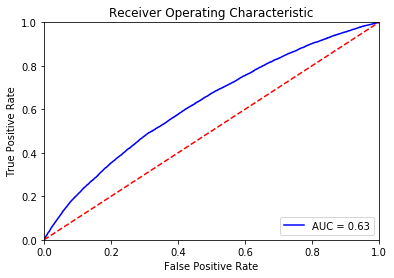

In [244]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [245]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [246]:
precision, recall, thresholds = precision_recall_curve(y_test, predict)

In [247]:
average_precision_score = average_precision_score(y_test, predict)

In [248]:
from sklearn.metrics import precision_recall_curve

Text(0.5, 1.0, 'Precision-Recall curve: AP=0.61')

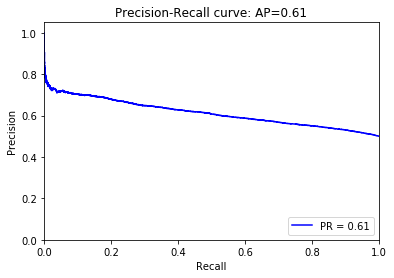

In [249]:
plt.title('Receiver Operating Characteristic')
plt.plot(recall, precision, 'b', label = 'PR = %0.2f' % average_precision_score)
plt.legend(loc = 'lower right')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision_score))

Предположим, что наш алгоритм должен обеспечивать полноту не менее 0.7. Какому порогу бинаризации вероятностей это будет соответствовать? Какую точность (precision) мы получим? Постройте матрицу ошибок для данного порога. Что вы можете сказать о таком алгоритме? (В свободной форме)

In [250]:
#По графику PR-кривой видно, что если полнота будет 0.7 и выше, тогда точность будет падать. Для этого нужно
#уменьшать порог t. 

In [303]:
prec, rec, thr = precision_recall_curve(y_test, predict)
for precision, recall, thresholds in zip(prec, rec, thr):
    if recall >= 0.7:
        print(f' thresholds = {thresholds} Precision = {precision} Recall = {recall}')

 thresholds = 0.21382130501123542 Precision = 0.500070001400028 Recall = 1.0
 thresholds = 0.21500756761270806 Precision = 0.500060002400096 Recall = 0.999960004799424
 thresholds = 0.21630613331097878 Precision = 0.5000650032501625 Recall = 0.999960004799424
 thresholds = 0.2169255699374667 Precision = 0.500070004200252 Recall = 0.999960004799424
 thresholds = 0.21696605748890493 Precision = 0.5000750052503675 Recall = 0.999960004799424
 thresholds = 0.21764743964003982 Precision = 0.5000800064005121 Recall = 0.999960004799424
 thresholds = 0.21772231200313444 Precision = 0.5000850076506885 Recall = 0.999960004799424
 thresholds = 0.21854417509288543 Precision = 0.5000900090009001 Recall = 0.999960004799424
 thresholds = 0.2191775860677662 Precision = 0.5000950104511497 Recall = 0.999960004799424
 thresholds = 0.22136493869658902 Precision = 0.5001000120014402 Recall = 0.999960004799424
 thresholds = 0.2237221782601504 Precision = 0.5001050136517747 Recall = 0.999960004799424
 thresho

 thresholds = 0.3405932567964391 Precision = 0.5101578715642493 Recall = 0.9732032156141263
 thresholds = 0.34059714699527477 Precision = 0.5101632195234451 Recall = 0.9732032156141263
 thresholds = 0.34059758400858436 Precision = 0.5101685675947668 Recall = 0.9732032156141263
 thresholds = 0.3406099356415714 Precision = 0.510173915778218 Recall = 0.9732032156141263
 thresholds = 0.340615336603978 Precision = 0.5101792640738023 Recall = 0.9732032156141263
 thresholds = 0.3406166640470662 Precision = 0.510184612481523 Recall = 0.9732032156141263
 thresholds = 0.3406329635753615 Precision = 0.5101899610013838 Recall = 0.9732032156141263
 thresholds = 0.3406457568329078 Precision = 0.5101953096333882 Recall = 0.9732032156141263
 thresholds = 0.34065191115625654 Precision = 0.5102006583775397 Recall = 0.9732032156141263
 thresholds = 0.3406654268230765 Precision = 0.5102060072338418 Recall = 0.9732032156141263
 thresholds = 0.3406773356211535 Precision = 0.5102113562022981 Recall = 0.97320

 thresholds = 0.3692059892699036 Precision = 0.5197253681259244 Recall = 0.941567011958565
 thresholds = 0.36920682245347436 Precision = 0.5197311050522667 Recall = 0.941567011958565
 thresholds = 0.369207434236205 Precision = 0.5197368421052632 Recall = 0.941567011958565
 thresholds = 0.36922405979834505 Precision = 0.519742579284918 Recall = 0.941567011958565
 thresholds = 0.3692294307646987 Precision = 0.5197319762885119 Recall = 0.941527016757989
 thresholds = 0.36922985613148523 Precision = 0.5197107688910968 Recall = 0.9414470263568372
 thresholds = 0.3692534437973769 Precision = 0.5197165062262651 Recall = 0.9414470263568372
 thresholds = 0.3692558303035701 Precision = 0.5197222436881093 Recall = 0.9414470263568372
 thresholds = 0.3692559588761841 Precision = 0.5197279812766333 Recall = 0.9414470263568372
 thresholds = 0.3692568781926638 Precision = 0.5197337189918415 Recall = 0.9414470263568372
 thresholds = 0.3692614775462842 Precision = 0.5197394568337381 Recall = 0.941447026

 thresholds = 0.3879193935633996 Precision = 0.5282628409328713 Recall = 0.9086509618845738
 thresholds = 0.3879213688465016 Precision = 0.5282689825956541 Recall = 0.9086509618845738
 thresholds = 0.3879234438856192 Precision = 0.5282751244012464 Recall = 0.9086509618845738
 thresholds = 0.38792377693450747 Precision = 0.528281266349653 Recall = 0.9086509618845738
 thresholds = 0.38793662821478836 Precision = 0.5282648125755743 Recall = 0.90859096908371
 thresholds = 0.3879376692652547 Precision = 0.5282709546897345 Recall = 0.90859096908371
 thresholds = 0.3879377016720928 Precision = 0.5282770969467246 Recall = 0.90859096908371
 thresholds = 0.38794285911365234 Precision = 0.5282832393465496 Recall = 0.90859096908371
 thresholds = 0.3879572470130031 Precision = 0.5282893818892145 Recall = 0.90859096908371
 thresholds = 0.3879588928089604 Precision = 0.5282955245747242 Recall = 0.90859096908371
 thresholds = 0.38796103397188203 Precision = 0.5283016674030836 Recall = 0.90859096908371

 thresholds = 0.40461445769717835 Precision = 0.5367274976801732 Recall = 0.867515898092229
 thresholds = 0.40461490409708784 Precision = 0.5367341383747402 Recall = 0.867515898092229
 thresholds = 0.40461676423356424 Precision = 0.536740779233634 Recall = 0.867515898092229
 thresholds = 0.40462119526636836 Precision = 0.5367474202568607 Recall = 0.867515898092229
 thresholds = 0.40462193851020345 Precision = 0.5367540614444266 Recall = 0.867515898092229
 thresholds = 0.4046257040718242 Precision = 0.5367607027963376 Recall = 0.867515898092229
 thresholds = 0.40462633026658046 Precision = 0.5367673443125998 Recall = 0.867515898092229
 thresholds = 0.40462877136375985 Precision = 0.5367739859932193 Recall = 0.867515898092229
 thresholds = 0.4046309156765506 Precision = 0.5367806278382024 Recall = 0.867515898092229
 thresholds = 0.4046386631309506 Precision = 0.536787269847555 Recall = 0.867515898092229
 thresholds = 0.40464171101502466 Precision = 0.5367939120212831 Recall = 0.867515898

 thresholds = 0.4183743205359349 Precision = 0.544769852516664 Recall = 0.8302603687557493
 thresholds = 0.4183828082572967 Precision = 0.5447579057866422 Recall = 0.8302203735551734
 thresholds = 0.4183830357929202 Precision = 0.5447399845158581 Recall = 0.8301603807543095
 thresholds = 0.4183833683341358 Precision = 0.5447542812151434 Recall = 0.8301603807543095
 thresholds = 0.41838536198691895 Precision = 0.5447614298462023 Recall = 0.8301603807543095
 thresholds = 0.4183889090029719 Precision = 0.5447685786648819 Recall = 0.8301603807543095
 thresholds = 0.4183953965550541 Precision = 0.5447757276711898 Recall = 0.8301603807543095
 thresholds = 0.4183972778609556 Precision = 0.544782876865133 Recall = 0.8301603807543095
 thresholds = 0.4184008660474284 Precision = 0.544764954460747 Recall = 0.8301003879534455
 thresholds = 0.418407592786678 Precision = 0.5447721038886045 Recall = 0.8301003879534455
 thresholds = 0.4184105862523908 Precision = 0.5447661294556144 Recall = 0.83008039

 thresholds = 0.43212731387429965 Precision = 0.5526567197729636 Recall = 0.7866456025276967
 thresholds = 0.4321290358894501 Precision = 0.552664484313753 Recall = 0.7866456025276967
 thresholds = 0.4321310706964774 Precision = 0.5526722490727212 Recall = 0.7866456025276967
 thresholds = 0.4321393950410723 Precision = 0.5526800140498771 Recall = 0.7866456025276967
 thresholds = 0.43214244392713536 Precision = 0.55268777924523 Recall = 0.7866456025276967
 thresholds = 0.4321535270624464 Precision = 0.5526955446587891 Recall = 0.7866456025276967
 thresholds = 0.4321562704658906 Precision = 0.5527033102905637 Recall = 0.7866456025276967
 thresholds = 0.432157098821613 Precision = 0.5526907404805396 Recall = 0.7866056073271207
 thresholds = 0.4321585123663063 Precision = 0.5526985063721565 Recall = 0.7866056073271207
 thresholds = 0.43215977165775615 Precision = 0.5527062724820144 Recall = 0.7866056073271207
 thresholds = 0.43216147758538914 Precision = 0.5527140388101227 Recall = 0.78660

 thresholds = 0.4453429831054635 Precision = 0.5601373530790991 Recall = 0.7404911410630725
 thresholds = 0.44534526897124443 Precision = 0.5601458264000242 Recall = 0.7404911410630725
 thresholds = 0.4453475727832137 Precision = 0.5601325184557667 Recall = 0.7404511458624965
 thresholds = 0.4453489005279572 Precision = 0.560140992088105 Recall = 0.7404511458624965
 thresholds = 0.445349117988495 Precision = 0.5601494659768237 Recall = 0.7404511458624965
 thresholds = 0.4453498115139979 Precision = 0.5601579401219346 Recall = 0.7404511458624965
 thresholds = 0.4453529738969255 Precision = 0.5601664145234493 Recall = 0.7404511458624965
 thresholds = 0.4453561878124271 Precision = 0.5601464514274476 Recall = 0.7403911530616326
 thresholds = 0.44535838448905124 Precision = 0.5601549261679981 Recall = 0.7403911530616326
 thresholds = 0.4453585993736346 Precision = 0.5601416164856114 Recall = 0.7403511578610567
 thresholds = 0.44536317198769293 Precision = 0.5601500915376818 Recall = 0.7403

In [324]:
#Возьем порог 0.3889663830044255, тогда Precision = 0.5290713952403173 Recall = 0.9069311682598088
y_pred = (predict > 0.3889663830044255).astype(int)

In [323]:
from sklearn.metrics import confusion_matrix

In [325]:
confusion_matrix(y_test, y_pred)

array([[ 9626, 40368],
       [ 4657, 45349]])

In [327]:
#При таком пороге очень высокая полнота, но низкая точность. Это свидетельствует о том, что алгорит
#может прогнозировать почти все объекты из первого класса. Порог следует выбирать исходя из условия задачи.
#Для некоторых задач важнее полнота, для других точность. Например, в случае медицинской диагностики важнее 
#полнота. Лучше выявить как можно больше больных пациентов и где-то ошибиться, чем кого-то упустить. 

### Задание 4. Кодирование категориальных признаков (1 балл)

Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество моделей. Измерьте время, потребовавшееся на обучение модели.

In [251]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

In [252]:
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

In [253]:
feature = list(data)
feature

['ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [254]:
cat_feature = [feature for feature in list(data) if 'cat' in feature]

In [255]:
cat_feature

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [256]:
#Закодируем признаки с помощью встроенной функции в пандасе.
data = pd.get_dummies(data,  columns=cat_feature, drop_first=False)

In [257]:
data.shape

(200000, 226)

In [258]:
list(data)

['ps_ind_01',
 'ps_ind_03',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin',
 'ps_ind_02_cat_-1',
 'ps_ind_02_cat_1',
 'ps_ind_02_cat_2',
 'ps_ind_02_cat_3',
 'ps_ind_02_cat_4',
 'ps_ind_04_cat_-1',
 'ps_ind_04_cat_0',
 'ps_ind_04_cat_1',
 'ps_ind_05_cat_-1',
 'ps_ind_05_cat_0',
 'ps_ind_05_cat_1',
 'ps_ind_05_cat_2',
 'ps_ind_05_cat_3',
 'ps_ind_05_cat_4',
 'ps_ind_05_cat_5',
 'ps_in

In [259]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [260]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [261]:
%%time
classifier = LogisticRegression(penalty='l1', C=0.01).fit(X_train_norm, y_train)

CPU times: user 32.8 s, sys: 153 ms, total: 32.9 s
Wall time: 32.9 s


In [262]:
proba = classifier.predict_proba(X_test_norm)
predict_clf = proba[:, 1]

In [263]:
predict_clf

array([0.46301712, 0.70237592, 0.48812544, ..., 0.54649595, 0.64372487,
       0.4137647 ])

In [265]:
#Модель стала работать лучше. 
y_predict = classifier.predict(X_test_norm)
print(f'ROC_AUC: {roc_auc_score(y_test, predict_clf)}')

ROC_AUC: 0.6329816375149356


### Задание 5. Калибровка вероятностей (4 балла)

В этом задании предлагается самостоятельно разобраться с калибровкой вероятностей. Для этого можно прочитать первый раздел в [конспекте](https://github.com/esokolov/ml-course-hse/blob/master/2018-fall/seminars/sem06.pdf).

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [266]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    segment_width = 1.0 / n_bins
    for i in range(n_bins):
        left = segment_width * i
        right = segment_width * (i + 1)
        bin_middle_points.append((left + right) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= left) & (preds < right)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios)

Постройте калибровочную кривую для логистической регрессии (на той же самой выборке с тем же самым разбиением — можно использовать уже полученные ранее предсказания). Изучите распределение ответов классификатора (постройте гистограмму с помощью `plt.hist`).

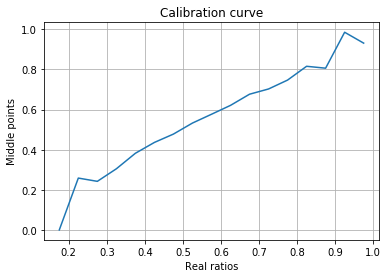

In [267]:
predict = classifier.predict_proba(X_test_norm)
plot_calibration_curve(y_test, predict_clf)
plt.title('Calibration curve')
plt.xlabel('Real ratios')
plt.ylabel('Middle points')
plt.grid(True)
plt.show()

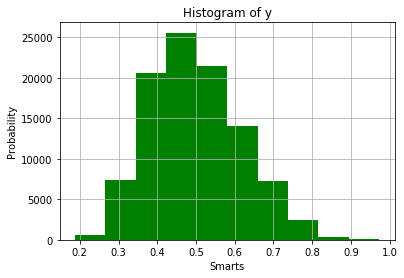

In [268]:
plt.hist(predict_clf, facecolor='g')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of y')
plt.grid(True)
plt.show()

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей логистической регресии на обучении и постройте с его помощью предсказание для тестовой выборки. Нарисуйте на одном графике калибровочную кривую до и после калибровки. Есть ли улучшения?

In [269]:
from sklearn.calibration import CalibratedClassifierCV

In [270]:
classifier = LogisticRegression(penalty='l1', C=0.01)
clf_sigmoid = CalibratedClassifierCV(classifier, method='sigmoid')
clf_sigmoid.fit(X_train_norm, y_train)
prob_sigmoid = clf_sigmoid.predict_proba(X_test_norm)[:, 1]

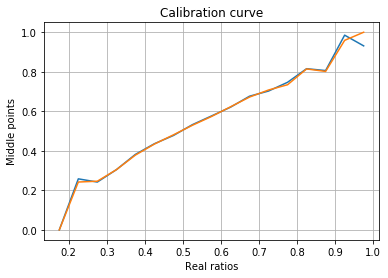

In [271]:
plot_calibration_curve(y_test, predict_clf)
plot_calibration_curve(y_test, prob_sigmoid)
plt.title('Calibration curve')
plt.xlabel('Real ratios')
plt.ylabel('Middle points')
plt.grid(True)
plt.show()

In [311]:
#Да, но совсем небольшие. 

Что будет, если усилить регуляризацию логистической регресии в $10^3$ раз? Нарисуйте на одном графике калибровочную кривую для сильно регуляризованной регресии и для неё же после калибровки. Есть ли улучшения?

In [306]:
classifier_new = LogisticRegression(penalty='l1', C=0.00001).fit(X_train_norm, y_train)
predict_new = classifier_new_reg.predict_proba(X_test_norm)[:, 1]

In [307]:
predict_new

array([0.45433702, 0.60765526, 0.52772506, ..., 0.50907548, 0.54860019,
       0.3861098 ])

In [308]:
clf_sigmoid = CalibratedClassifierCV(classifier_new, method='sigmoid')
clf_sigmoid.fit(X_train_norm, y_train)
prob_sigmoid = clf_sigmoid.predict_proba(X_test_norm)[:, 1]

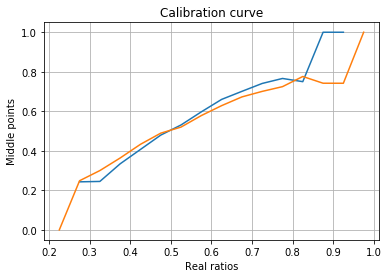

In [309]:
plot_calibration_curve(y_test, predict_new)
plot_calibration_curve(y_test, prob_sigmoid)
plt.title('Calibration curve')
plt.xlabel('Real ratios')
plt.ylabel('Middle points')
plt.grid(True)
plt.show()

In [310]:
#Не совсем понятно, какая кривая лучше. Думаю, что если попробовать поменять параметры модели или калибровки,
#то можно улучшить показатели. 
#╰( ͡° ͜ʖ ͡° )つ──☆*